"""
A class that can draw rectangles and circles
on the same coordinate grid using matplotlib.

Attributes:
- shapes (list): keeps all shapes that are added (Rectangle or Circle).

    Logic:
    - Uses matplotlib to open a figure (window) and a grid (axes).
    - Each shape in the list is checked:
        if it has width and height = it is a rectangle
        if it has radius = it is a circle
    - The shapes are then drawn with color, transparency, and area label.

    Methods:
    - add_shape(): adds a Rectangle or Circle object to the list.
    - plot_all(): Public Method = draws every added shape together on one grid.

    The following are HELPERS for internal use only:
    - _plot_rectangle(): helper method that draws one rectangle.
    - _plot_circle(): helper method that draws one circle.

    Other info:
    - Keeps all shapes together (composition).
    - Works with shapes that inherit from Geometry.


| Method              | Leading        | Purpose                                | Who uses it             |
| ------------------- | -------------- | ------------------------------------- | ------------------------ |
| `add_shape()`       | No             | Public method for adding shapes       | Outside                  |
| `plot_all()`        | No             | Public method for plotting all shapes | Outside                  |
| `_plot_rectangle()` | Yes            | Internal helper for rectangles        | Used inside `plot_all()` |
| `_plot_circle()`    | Yes            | Internal helper for circles           | Used inside `plot_all()` |


| Method                       | Uses                          | Purpose           |
| ---------------------------- | ----------------------------- | ----------------- |
| `_plot_rectangle(ax, shape)` | `shape.width`, `shape.height` | Draws a rectangle |
| `_plot_circle(ax, shape)`    | `shape.radius`                | Draws a circle    |


In [ ]:
import matplotlib.pyplot as plt
from circle import Circle
from rectangle import Rectangle

# Rectangle and Circle patches are special drawing tools inside matplotlib
# This tool help from LLM
from matplotlib.patches import Rectangle as MplRectangle, Circle as MplCircle

In [ ]:
"""
One class to plot the 2D shapes
"""
class Shape2DPlotter:
    # an empty list to collect the Circle and Rectangle
    def __init__(self):
        self.shapes = []

    def add_shape(self, shape):
        # method to append the Circle and Rectangle into shapes list
        self.shapes.append(shape)

    #-------------------------
    # Plot Rectangle method
    # ------------------------

    def _plot_rectangle(self, ax, shape):
        # Create a rectangle 
        # LLM help to make internal
        # (shape.x, shape.y)  bottom-left corner of the rectangle
        # shape.width, shape.height  size of the rectangle that extends

        # MplRectangle reference in readme

        rectangle_draw = MplRectangle(
            (shape.x, shape.y),
            shape.width,
            shape.height,          
            edgecolor="blue",      # outline color of the rectangle
            facecolor="lightgreen",# fill color inside the rectangle
            alpha= 0.6              # transparency (0.0 = invisible, 1.0 = solid)
        )

        # Add this rectangle to the grid (ax = "axes", the drawing area)
        # reference available in readme
        ax.add_patch(rectangle_draw)


        # LLM Help:
        # Add text label in the center of the rectangle
        # (shape.x + shape.width / 2)  halfway point along width (center X)
        # (shape.y + shape.height / 2) → halfway point along height (center Y)
        ax.text(
            shape.x + shape.width / 2,
            shape.y + shape.height / 2,
            f"Rect\nA = {shape.area:.1f}",  # label shows "Rect" and area value
            ha="center",                  # center text horizontally
            va="center",                  # center text vertically
            fontsize = 9,                   # text size
        )


    #-------------------------
    # Plot Cirlce method
    # ------------------------

    def _plot_circle(self, ax, shape):
        # Create a true circle
        # LLM help to make internal
        # (shape.x, shape.y) center of the circle
        # shape.radius → radius of the circle

        # MplCircle reference in readme
        circle_draw = MplCircle(
            (shape.x, shape.y),
            shape.radius,
            edgecolor = "red",
            facecolor = "pink",
            alpha = 0.6
        )

        # Add this circle to the grid (the axes)
        # patch reference available in readme
        ax.add_patch(circle_draw)

        # LLM Help:
        # ax.text reference in readme
         # Add text at the center of the circle
        ax.text(
            shape.x,                # center X position
            shape.y,                # center Y position
            f"Circle\nA={shape.area:.1f}",  # show shape type + area
            ha="center",
            va="center",
            fontsize = 12,
        )

    # ------------------
    #    MAIN PLOTTER
    # ------------------

    def main_plotter(self):
        # Draw available shapes from list on one grid

        # Idea for validation from LLM
        # if list is empty
        if not self.shapes:
            print("No shapes data in the list. Please append your Geometry(Circle, Rectangle, Cube or Sphere) class.")
            return
        
        # subplots reference in readme
        # figure (window) and axes (grid to draw)
        fig, ax = plt.subplots()

        # if it passes the validation, loop in shape list
        # check if has radius / width and height

        for shape in self.shapes:
            # if rectangle
            if hasattr(shape, "width") and hasattr(shape, "height"):
                self._plot_rectangle(ax, shape)  # call the internal helper
            
            # if circle
            elif hasattr(shape, "radius"):
                self._plot_circle # call internal helper
            
            else:
                print(f"Nothing to plot here.")

    # -------------------------
    #         DISPLAY
    # -------------------------

        # To form a TRUE CIRCLE
        # 'equal': same as aspect=1, i.e. same scaling for x and y.
        # reference on readme
        ax.set_aspect("equal")

        # Label axes to show directions
        ax.set_xlabel("x")
        ax.set_ylabel("y")

        # Add a title 
        ax.set_title("Lab 2 Geometry: 2D Shape Plotter")

        # Show a grid lines
        # reference readme
        ax.grid(True)

        # LLM Help: reference readme
        # Automatically adjust the grid limits to include all shapes
        ax.autoscale()

        plt.show()


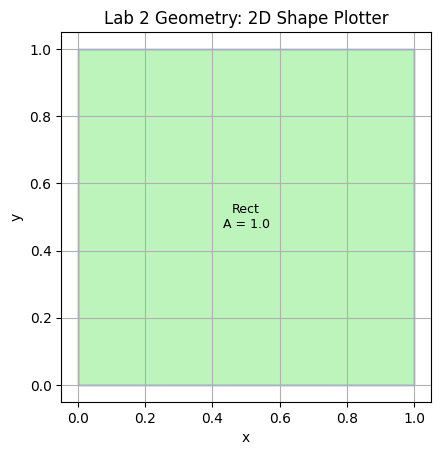

In [ ]:

r1 = Rectangle(0, 0, 1, 1)
c1 = Circle(x = 0, y = 0, radius = 1)
c2 = Circle(x=1, y=1, radius=1)


# create plotter
plotter = Shape2DPlotter()

# plot shapes
plotter.add_shape
plotter.add_shape(r1)
plotter.add_shape(c1)
plotter.add_shape(c2)
plotter.main_plotter()